### ***Fraud Detection In Banking Using Machine Learning Models***
Detecting and preventing fraudulent actions within the financial system is the main goal of fraud detection in banking utilising machine learning models. By analysing vast amounts of transactional data and finding trends and anomalies that may suggest fraudulent behaviour, machine learning models can help automate the process of fraud detection.

**1. Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##### **2. Processing the data**

#### Loading the transactional data

In [2]:
for num in range(132):
  filename= f'/content/sample_data/dataset/transactions_{num}.csv'

  data = pd.read_csv(filename, delimiter='|')
  print(f'{filename}')
  print(data)

  new_file = f'/content/sample_data/dataset/new_transactions_{num}.csv'
  data.to_csv(new_file, index=False)

/content/sample_data/dataset/transactions_0.csv
                  cc_num      acct_num                         trans_num  \
0          4218196001337  888022315787  91ab12e73ef38206e1121e9648d2408d   
1          4218196001337  888022315787  071553d533a6822a4431c354c434ddcb   
2          4218196001337  888022315787  0cfad38ef15e4749eff68dc83f62c151   
3          4218196001337  888022315787  5782693d7c70f062f258cb30bfa8900f   
4          4218196001337  888022315787  35fd7db657d7e30dd608c37f7798186e   
...                  ...           ...                               ...   
108123  3592927524372804  632265815336  b4f6bc50e8c25083554f7a6365fbd020   
108124  3592927524372804  632265815336  a2eb246a2082a232256fdb91a115f574   
108125  3592927524372804  632265815336  58f1916fef29a345f45d3f99728b8bea   
108126  3592927524372804  632265815336  974d131d9a8894661dfd6bd034aa6511   
108127  3592927524372804  632265815336  90f6b22704e30cc8cfb7068104cc8b22   

         unix_time        category    a

#### Merging data to one file

In [3]:
import os
import csv 

directory = "/content/sample_data/dataset"
merged_filename = "transactions.csv"

# Creating a CSV writer object with '|' as the delimiter for the merged file
with open(os.path.join(directory, merged_filename), 'w', newline='') as outfile:
  writer = csv.writer(outfile, delimiter='|')

  # Loop through all the files that match the pattern
  for filename in glob.glob(directory + "/transactions_[0-9]*.csv"):

  # Open the file for reading
    with open(filename, 'r') as infile:

    # Creating a CSV reader object with '|' as the delimiter
      reader = csv.reader(infile, delimiter='|')
      
      # Loop through each row in the file and write it to the merged file
      for row in reader:
        writer.writerow(row)

trans= pd.read_csv('/content/sample_data/dataset/transactions.csv', delimiter='|')
trans.to_csv('transactions.csv', index=False)
trans

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,345331586923222,903253916954,e27acf7ff2e796804d189d09b6fc4318,1648136912,grocery_net,54.57,0,Solis-Carlson,39.261204,-74.917412
1,345331586923222,903253916954,8738514f11d4bd8efeedbe72830bbb13,1645461229,gas_transport,55.63,0,"Collins, Kramer and Shaw",40.320181,-74.315647
2,345331586923222,903253916954,21c4b7105a1665323d3d2905a08f0c6d,1643817753,gas_transport,35.27,0,"Mcgee, Smith and Schroeder",39.192935,-74.892697
3,345331586923222,903253916954,99b32dab08deb551530fb4122bae8593,1642861828,gas_transport,81.31,0,"Jacobs, Miller and Hayes",39.275767,-75.813709
4,345331586923222,903253916954,b0e5828a5ec6e503e93b269a5834b149,1648942439,grocery_pos,61.92,0,Sullivan PLC,40.254785,-76.18864
...,...,...,...,...,...,...,...,...,...,...
4261030,6584732365337749,843643900137,7b2b63508d92d5dd61446fb5cb03e301,1667282786,personal_care,5.74,0,Dennis Inc,44.17282,-90.422277
4261031,6584732365337749,843643900137,1df5a10b715d536a666143ebb429a818,1591184669,misc_pos,8.28,0,"Beck, Mcneil and Benjamin",43.413139,-91.058986
4261032,6584732365337749,843643900137,67f8305d28b564b34ccf264b9f4ea764,1625045557,food_dining,9.98,0,Lee-Schneider,43.853512,-90.834174
4261033,6584732365337749,843643900137,4d3333cd26ba3ac993151b30b474e94e,1667465864,personal_care,9.42,0,Benson Inc,43.025016,-91.550511


#### Loading customer data

In [4]:
data = pd.read_csv('/content/sample_data/dataset/customers.csv',delimiter='|')
print(data)
data.to_csv('customers.csv',index=False)

             ssn               cc_num     first       last gender  \
0    115-04-4507        4218196001337  Jonathan    Johnson      M   
1    715-55-5575  4351161559407816183    Elaine     Fuller      F   
2    167-48-5821        4192832764832   Michael    Cameron      M   
3    406-83-7518     4238849696532874   Brandon   Williams      M   
4    697-93-1877     4514627048281480      Lisa  Hernandez      F   
..           ...                  ...       ...        ...    ...   
995  392-96-7670       30125158904184     Sarah     Martin      F   
996  594-17-7993      180047909863618      Erin      Wells      F   
997  196-93-1156        4371450311809   Michael      James      M   
998  895-65-9304     3519925692476886   Michael      Lewis      M   
999  107-40-0160      343251790447085     Isaac      Smith      M   

                              street              city state    zip      lat  \
0               863 Lawrence Valleys            Ambler    PA  19002  40.1809   
1         3

In [5]:
cus = pd.read_csv('customers.csv')
cus.head(10)

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
1,715-55-5575,4351161559407816183,Elaine,Fuller,F,310 Kendra Common Apt. 164,Leland,NC,28451,34.2680,-78.0578,27112,Professor Emeritus,1963-06-07,917558277935
2,167-48-5821,4192832764832,Michael,Cameron,M,05641 Robin Port,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,1973-05-30,718172762479
3,406-83-7518,4238849696532874,Brandon,Williams,M,26916 Carlson Mountain,Birmingham,AL,35242,33.3813,-86.7046,493806,Seismic interpreter,1942-12-26,947268892251
4,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Fargo,GA,31631,30.7166,-82.5801,559,Medical laboratory scientific officer,1939-05-22,888335239225
5,246-08-3947,3517182278248964,Vincent,Hickman,M,465 Lam Mission,Forsyth,GA,31029,33.0508,-83.9362,16287,Community arts worker,1976-06-18,245877882397
6,347-03-9639,213193010310510,Kayla,Ramirez,F,82997 Kristen Valley Suite 311,Patterson,LA,70392,29.6967,-91.2812,8456,Plant breeder/geneticist,1939-03-06,465378164447
7,479-94-0888,4065133387262473,Danielle,Leblanc,F,108 Tanya Terrace Apt. 267,Rochester,MI,48307,42.6593,-83.1225,97195,Quarry manager,1973-12-27,950105810049
8,061-22-6210,630447468723,Cheryl,Robinson,F,805 Brendan Neck,Lakewood,CA,90715,33.8405,-118.0767,79812,Retail buyer,2002-08-23,940251608167
9,162-08-8321,2222913619399092,Bradley,Sandoval,M,3534 Anderson Rue Suite 751,Glendale,CA,91202,34.1652,-118.2656,172817,Acupuncturist,1985-01-26,684868121383


### **Exploring the data**

#### Finding null values

In [6]:
trans.isnull().sum()

cc_num        0
acct_num      0
trans_num     0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
dtype: int64

In [7]:
cus.isnull().sum()

ssn         0
cc_num      0
first       0
last        0
gender      0
street      0
city        0
state       0
zip         0
lat         0
long        0
city_pop    0
job         0
dob         0
acct_num    0
dtype: int64

In [8]:
trans.dtypes

cc_num        object
acct_num      object
trans_num     object
unix_time     object
category      object
amt           object
is_fraud      object
merchant      object
merch_lat     object
merch_long    object
dtype: object

In [9]:
cus.dtypes

ssn          object
cc_num        int64
first        object
last         object
gender       object
street       object
city         object
state        object
zip           int64
lat         float64
long        float64
city_pop      int64
job          object
dob          object
acct_num      int64
dtype: object

Merging customers and transactional data

In [10]:
merged_data = pd.merge(trans,cus,on='acct_num')
print(merged_data.columns)

Index(['cc_num_x', 'acct_num', 'trans_num', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'ssn', 'cc_num_y',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob'],
      dtype='object')


Saving the dataframe in a new csv file

In [11]:
merged_data.to_csv('merged_data.csv', index=False)
m_data = pd.read_csv('merged_data.csv')
m_data.head(7)

,cc_num_x,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,...,gender,street,city,state,zip,lat,long,city_pop,job,dob
0,676305278100,930558644123,34821a75f2a6ef420bfe6b775ef7ebb6,1558633432,grocery_net,196.24,0,"Buckley, Hicks and Cardenas",29.523647,-99.792043,...,F,02722 Kyle Island,Eagle Pass,TX,78852,28.7028,-100.4818,53040,"Psychologist, educational",1996-12-04
1,676305278100,930558644123,47504e5f0f060d0ba136241a7381d78c,1572390467,grocery_pos,198.80,0,Love-Anderson,29.183594,-100.726474,...,F,02722 Kyle Island,Eagle Pass,TX,78852,28.7028,-100.4818,53040,"Psychologist, educational",1996-12-04
2,676305278100,930558644123,330ac8785c386bcfedccda9450c6fcf1,1547506176,gas_transport,224.06,0,"Parrish, Jones and Perez",29.385604,-99.819727,...,F,02722 Kyle Island,Eagle Pass,TX,78852,28.7028,-100.4818,53040,"Psychologist, educational",1996-12-04
3,676305278100,930558644123,bf1b90eb153d61172bdaec4698e71b90,1553981956,grocery_net,211.69,0,Durham-Castillo,28.597910,-101.297027,...,F,02722 Kyle Island,Eagle Pass,TX,78852,28.7028,-100.4818,53040,"Psychologist, educational",1996-12-04
4,676305278100,930558644123,663a9e929cebced05428ec8a4293b0c6,1547666941,gas_transport,223.50,0,Perez-Brown,28.874921,-100.368831,...,F,02722 Kyle Island,Eagle Pass,TX,78852,28.7028,-100.4818,53040,"Psychologist, educational",1996-12-04
5,676305278100,930558644123,b9055adc45accd9f0abf0a3bbebac137,1576777975,misc_net,185.43,0,Thomas LLC,28.061927,-101.199775,...,F,02722 Kyle Island,Eagle Pass,TX,78852,28.7028,-100.4818,53040,"Psychologist, educational",1996-12-04
6,676305278100,930558644123,218cfc86fddc0af02f557cee48df8465,1559252707,grocery_net,229.89,0,Cruz-Chase,29.250376,-100.901874,...,F,02722 Kyle Island,Eagle Pass,TX,78852,28.7028,-100.4818,53040,"Psychologist, educational",1996-12-04


#### **Exploring merged data**

#### Finding missing values in merged data

In [12]:
m_data.isnull().sum()

cc_num_x      0
acct_num      0
trans_num     0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
ssn           0
cc_num_y      0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
dtype: int64

In [13]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574059 entries, 0 to 1574058
Data columns (total 24 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num_x    1574059 non-null  int64  
 1   acct_num    1574059 non-null  int64  
 2   trans_num   1574059 non-null  object 
 3   unix_time   1574059 non-null  int64  
 4   category    1574059 non-null  object 
 5   amt         1574059 non-null  float64
 6   is_fraud    1574059 non-null  int64  
 7   merchant    1574059 non-null  object 
 8   merch_lat   1574059 non-null  float64
 9   merch_long  1574059 non-null  float64
 10  ssn         1574059 non-null  object 
 11  cc_num_y    1574059 non-null  int64  
 12  first       1574059 non-null  object 
 13  last        1574059 non-null  object 
 14  gender      1574059 non-null  object 
 15  street      1574059 non-null  object 
 16  city        1574059 non-null  object 
 17  state       1574059 non-null  object 
 18  zip         1574059 no

In [14]:
m_data.describe()

,cc_num_x,acct_num,unix_time,amt,is_fraud,merch_lat,merch_long,cc_num_y,zip,lat,long,city_pop
count,1.574059e+06,1.574059e+06,1.574059e+06,1.574059e+06,1.574059e+06,1.574059e+06,1.574059e+06,1.574059e+06,1.574059e+06,1.574059e+06,1.574059e+06,1.574059e+06
mean,3.411746e+17,4.765663e+11,1.610985e+09,7.165052e+01,6.689711e-04,3.741340e+01,-9.121251e+01,3.411746e+17,4.999059e+04,3.741357e+01,-9.121186e+01,3.217979e+05
std,1.192472e+18,2.843779e+11,3.653670e+07,1.554710e+02,2.585583e-02,5.332681e+00,1.653408e+01,1.192472e+18,2.940708e+04,5.300707e+00,1.652393e+01,6.227823e+05
min,6.040027e+10,2.348758e+09,1.546261e+09,1.000000e+00,0.000000e+00,1.870250e+01,-1.603677e+02,6.040027e+10,1.571000e+03,1.970250e+01,-1.593683e+02,8.670000e+02
25%,2.131042e+14,2.307161e+11,1.577574e+09,9.710000e+00,0.000000e+00,3.368105e+01,-9.802434e+01,2.131042e+14,2.386000e+04,3.377160e+01,-9.779560e+01,1.868700e+04
50%,3.533223e+15,4.559282e+11,1.609393e+09,4.617000e+01,0.000000e+00,3.843453e+01,-8.626362e+01,3.533223e+15,4.803800e+04,3.857730e+01,-8.624790e+01,6.554000e+04
75%,4.609380e+15,7.173788e+11,1.641035e+09,8.358000e+01,0.000000e+00,4.132451e+01,-7.915028e+01,4.609380e+15,7.804000e+04,4.128000e+01,-7.896040e+01,2.156190e+05
max,4.983666e+18,9.993899e+11,1.672492e+09,3.177259e+04,1.000000e+00,6.263027e+01,-6.897910e+01,4.983666e+18,9.964500e+04,6.163030e+01,-6.997790e+01,2.906700e+06


<Axes: xlabel='unix_time', ylabel='Density'>

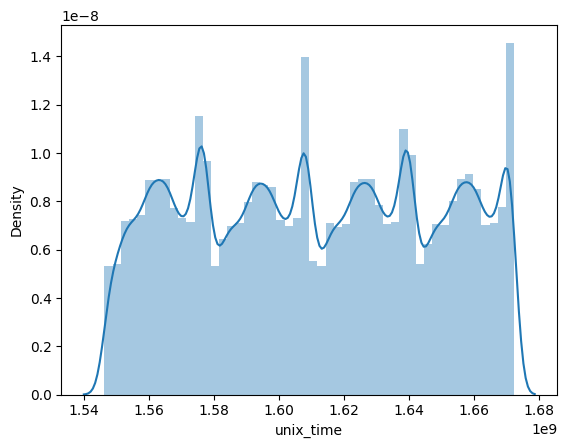

In [15]:
sns.distplot(m_data['unix_time'])

<Axes: xlabel='amt', ylabel='Density'>

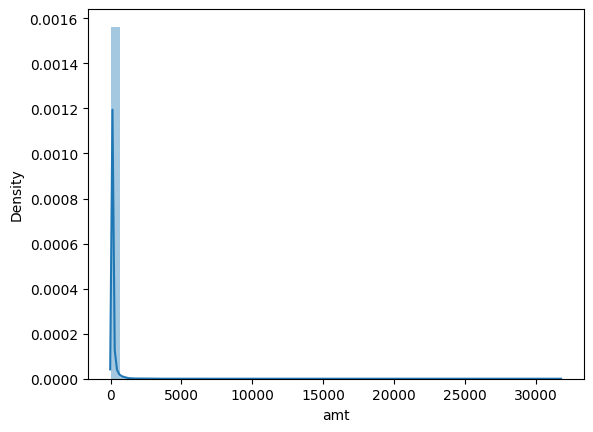

In [16]:
sns.distplot(m_data['amt'])

<Axes: >

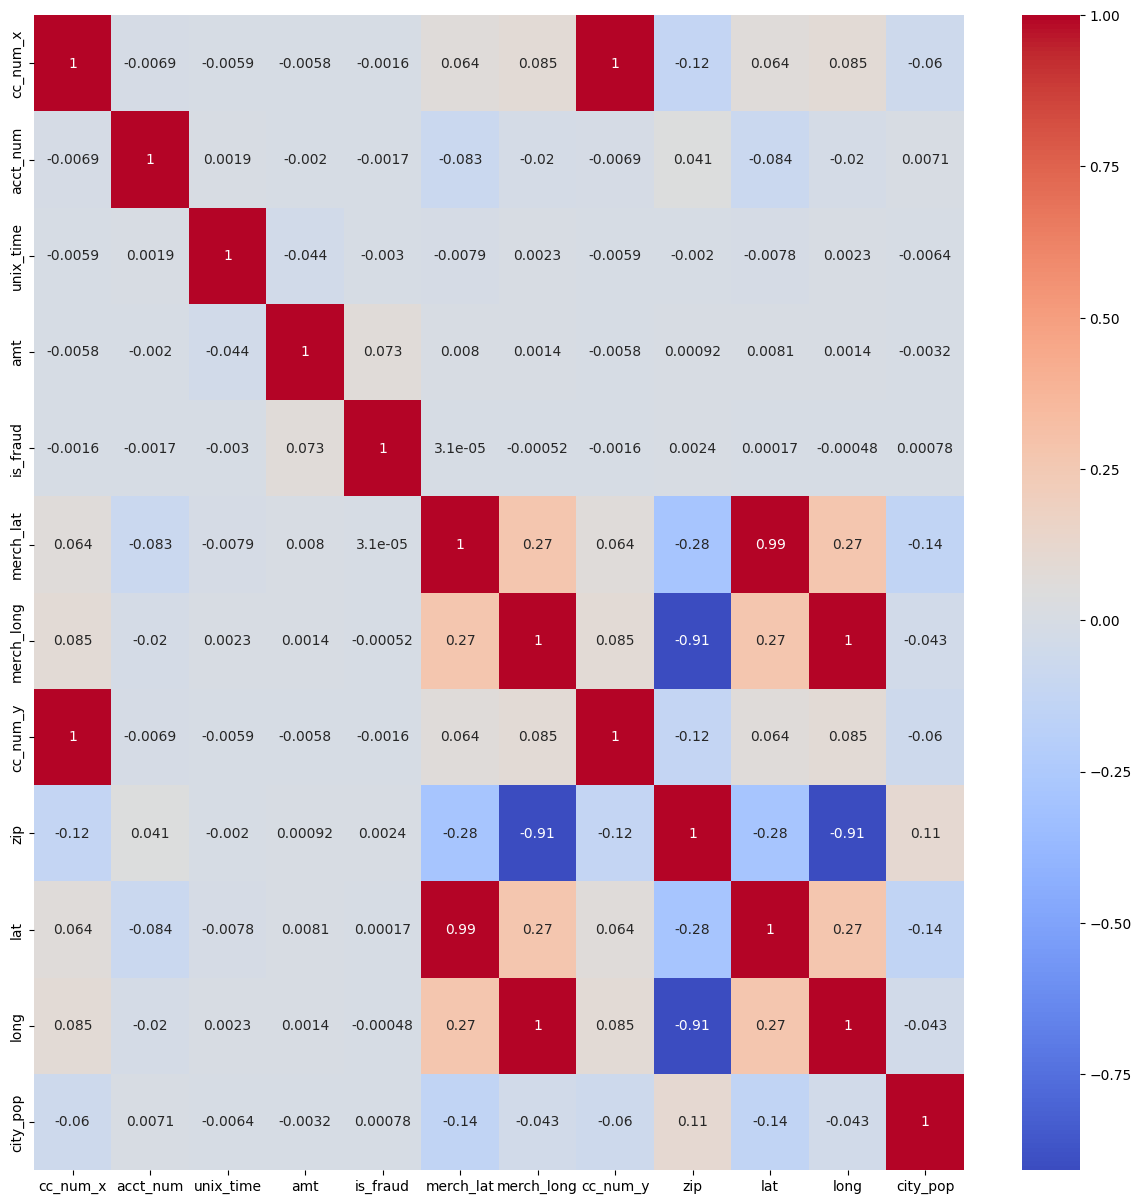

In [17]:
corr = m_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [18]:
m_data

,cc_num_x,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,...,gender,street,city,state,zip,lat,long,city_pop,job,dob
0,676305278100,930558644123,34821a75f2a6ef420bfe6b775ef7ebb6,1558633432,grocery_net,196.24,0,"Buckley, Hicks and Cardenas",29.523647,-99.792043,...,F,02722 Kyle Island,Eagle Pass,TX,78852,28.7028,-100.4818,53040,"Psychologist, educational",1996-12-04
1,676305278100,930558644123,47504e5f0f060d0ba136241a7381d78c,1572390467,grocery_pos,198.80,0,Love-Anderson,29.183594,-100.726474,...,F,02722 Kyle Island,Eagle Pass,TX,78852,28.7028,-100.4818,53040,"Psychologist, educational",1996-12-04
2,676305278100,930558644123,330ac8785c386bcfedccda9450c6fcf1,1547506176,gas_transport,224.06,0,"Parrish, Jones and Perez",29.385604,-99.819727,...,F,02722 Kyle Island,Eagle Pass,TX,78852,28.7028,-100.4818,53040,"Psychologist, educational",1996-12-04
3,676305278100,930558644123,bf1b90eb153d61172bdaec4698e71b90,1553981956,grocery_net,211.69,0,Durham-Castillo,28.597910,-101.297027,...,F,02722 Kyle Island,Eagle Pass,TX,78852,28.7028,-100.4818,53040,"Psychologist, educational",1996-12-04
4,676305278100,930558644123,663a9e929cebced05428ec8a4293b0c6,1547666941,gas_transport,223.50,0,Perez-Brown,28.874921,-100.368831,...,F,02722 Kyle Island,Eagle Pass,TX,78852,28.7028,-100.4818,53040,"Psychologist, educational",1996-12-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574054,6584732365337749,843643900137,7b2b63508d92d5dd61446fb5cb03e301,1667282786,personal_care,5.74,0,Dennis Inc,44.172820,-90.422277,...,F,2007 Harris Creek Suite 244,New Albin,IA,52160,43.4899,-91.2942,867,"Editor, film/video",1995-03-11
1574055,6584732365337749,843643900137,1df5a10b715d536a666143ebb429a818,1591184669,misc_pos,8.28,0,"Beck, Mcneil and Benjamin",43.413139,-91.058986,...,F,2007 Harris Creek Suite 244,New Albin,IA,52160,43.4899,-91.2942,867,"Editor, film/video",1995-03-11
1574056,6584732365337749,843643900137,67f8305d28b564b34ccf264b9f4ea764,1625045557,food_dining,9.98,0,Lee-Schneider,43.853512,-90.834174,...,F,2007 Harris Creek Suite 244,New Albin,IA,52160,43.4899,-91.2942,867,"Editor, film/video",1995-03-11
1574057,6584732365337749,843643900137,4d3333cd26ba3ac993151b30b474e94e,1667465864,personal_care,9.42,0,Benson Inc,43.025016,-91.550511,...,F,2007 Harris Creek Suite 244,New Albin,IA,52160,43.4899,-91.2942,867,"Editor, film/video",1995-03-11


In [19]:
new_data = m_data[['cc_num_x', 'acct_num','unix_time','cc_num_y','zip','city_pop','amt','is_fraud']]
new_data

,cc_num_x,acct_num,unix_time,cc_num_y,zip,city_pop,amt,is_fraud
0,676305278100,930558644123,1558633432,676305278100,78852,53040,196.24,0
1,676305278100,930558644123,1572390467,676305278100,78852,53040,198.80,0
2,676305278100,930558644123,1547506176,676305278100,78852,53040,224.06,0
3,676305278100,930558644123,1553981956,676305278100,78852,53040,211.69,0
4,676305278100,930558644123,1547666941,676305278100,78852,53040,223.50,0
...,...,...,...,...,...,...,...,...
1574054,6584732365337749,843643900137,1667282786,6584732365337749,52160,867,5.74,0
1574055,6584732365337749,843643900137,1591184669,6584732365337749,52160,867,8.28,0
1574056,6584732365337749,843643900137,1625045557,6584732365337749,52160,867,9.98,0
1574057,6584732365337749,843643900137,1667465864,6584732365337749,52160,867,9.42,0


In [20]:
X = new_data['amt'].values
y = new_data['is_fraud']
print(X)

[196.24 198.8  224.06 ...   9.98   9.42   6.57]


In [21]:
X = X.reshape(-1, 1)
print(X)

[[196.24]
 [198.8 ]
 [224.06]
 ...
 [  9.98]
 [  9.42]
 [  6.57]]


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

In [23]:
x_scaler[-1]

array([-0.41860247])

In [24]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.25, random_state=42, stratify=y)

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    393252
           1       0.00      0.00      0.00       263

    accuracy                           1.00    393515
   macro avg       0.50      0.50      0.50    393515
weighted avg       1.00      1.00      1.00    393515

F1 Score: 0.0


In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    393252
           1       0.08      0.04      0.05       263

    accuracy                           1.00    393515
   macro avg       0.54      0.52      0.53    393515
weighted avg       1.00      1.00      1.00    393515

F1 Score: 0.05459057071960298


In [27]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    393252
           1       0.00      0.00      0.00       263

    accuracy                           1.00    393515
   macro avg       0.50      0.50      0.50    393515
weighted avg       1.00      1.00      1.00    393515

F1 Score: 0.0


<Axes: ylabel='count'>

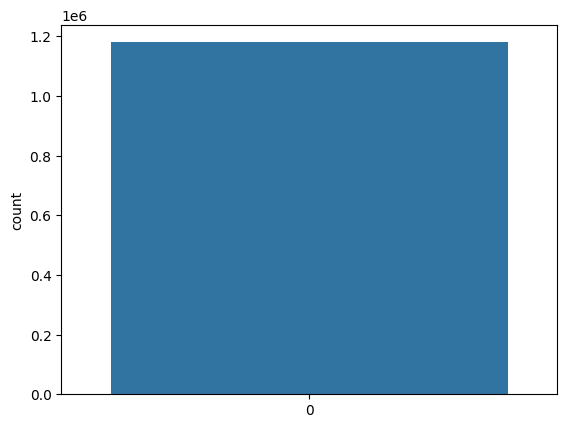

In [28]:
sns.countplot(y_train)

In [29]:
# hint - use combination of over sampling and under sampling
# balance the class with equal distribution
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)

<Axes: ylabel='count'>

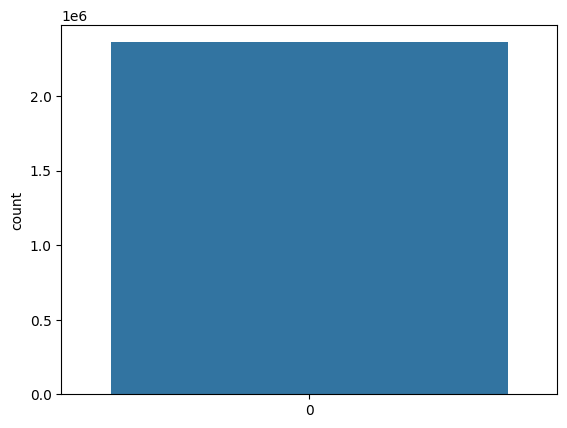

In [30]:
sns.countplot(y_smote)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    393252
           1       0.01      0.79      0.01       263

    accuracy                           0.93    393515
   macro avg       0.50      0.86      0.49    393515
weighted avg       1.00      0.93      0.96    393515

F1 Score: 0.014767781979025469


In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    393252
           1       0.02      0.51      0.04       263

    accuracy                           0.98    393515
   macro avg       0.51      0.75      0.52    393515
weighted avg       1.00      0.98      0.99    393515

F1 Score: 0.04256660886016081


In [33]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    393252
           1       0.01      0.85      0.01       263

    accuracy                           0.90    393515
   macro avg       0.50      0.88      0.48    393515
weighted avg       1.00      0.90      0.95    393515

F1 Score: 0.011791956201305537
